In [ ]:
#Harbina Putri Nafiah (223307043)
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [6]:
#import dataset
df = pd.read_csv('kurs rupiah to dollar.csv')

In [7]:
#preview dataset
df.head()

,Kurs Jual,Tanggal
0,15101.13,06/27/2023
1,15072.99,06/26/2023
2,14992.59,06/23/2023
3,15056.91,06/22/2023
4,15115.20,06/21/2023


In [8]:
df.describe()

,Kurs Jual
count,616.000000
mean,14748.818539
std,466.388401
min,13944.380000
25%,14396.377500
50%,14569.990000
75%,15050.382500
max,15820.710000


In [9]:
#cleansing dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  616 non-null    float64
 1   Tanggal    616 non-null    object 
dtypes: float64(1), object(1)
memory usage: 9.8+ KB


In [10]:
#melihat ukuran dataset
df.shape

(616, 2)

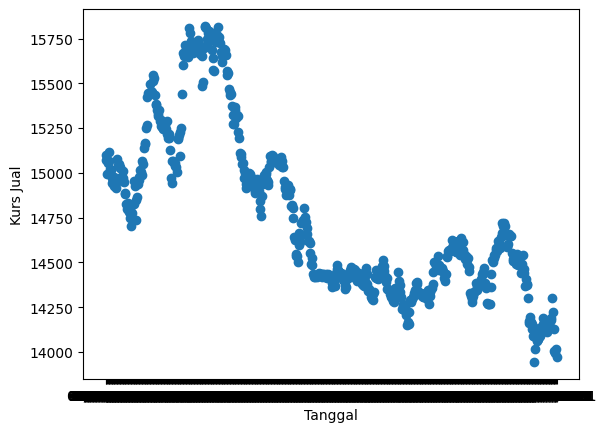

In [11]:
#menampilkan visualisasi scaterplot berdasar titik potong salary dan tearsexperience
df = pd.read_csv('kurs rupiah to dollar.csv')
plt.scatter(df['Tanggal'], df['Kurs Jual'])
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.show()

In [41]:
# Mengubah kolom 'Tanggal' menjadi format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%m/%d/%Y')

In [57]:
# Pisahkan data untuk pelatihan dan pengujian
X = df[['Tanggal_num']]  # Fitur (tanggal sebagai angka)
y = df['Kurs Jual']  # Target (nilai kurs jual)


In [58]:
# Pisahkan data menjadi data pelatihan dan pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [59]:
# Melatih model
model = MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=1000)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(16, 16), max_iter=1000)

In [61]:

#Menghitung MAE, MSE, RMSE, dan R-squared
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

MAE: 158.67551120729823
MSE: 33333.76410422825
RMSE: 182.5753655459253
R-squared: 0.16296187578234


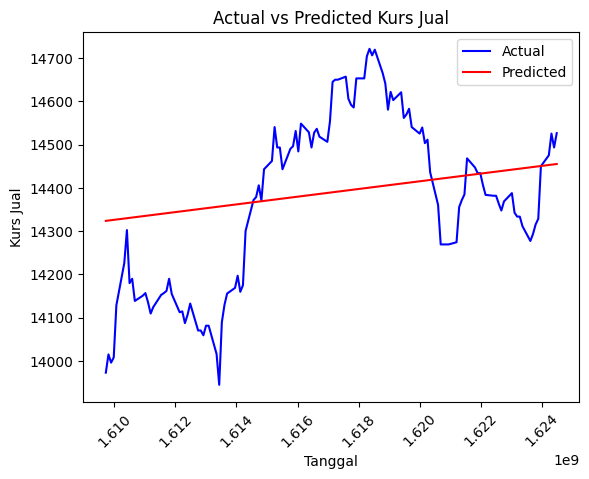

In [65]:
# Visualisasi hasil prediksi vs. aktual
plt.plot(X_test['Tanggal_num'], y_test, label='Actual', color='blue')
plt.plot(X_test['Tanggal_num'], y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Kurs Jual')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Menyimpan model
import joblib
joblib.dump(model, 'kurs_jual_model.pkl')

['kurs_jual_model.pkl']

In [73]:
# Memuat model yang disimpan
loaded_model = joblib.load('kurs_jual_model.pkl')
# Melakukan prediksi menggunakan model yang sudah disimpan
y_pred_loaded_model = loaded_model.predict(X_test)

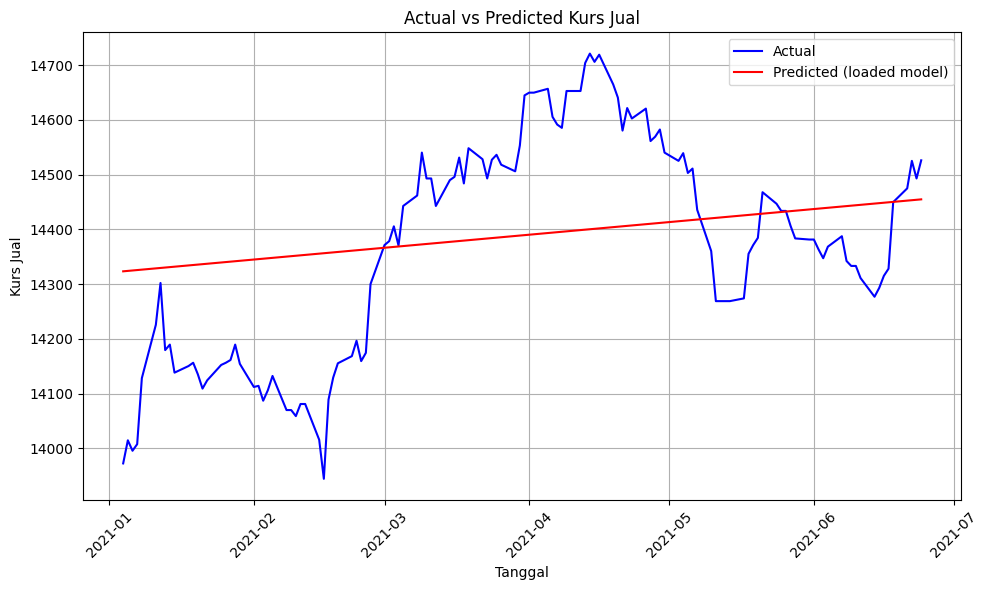

In [71]:
# Melakukan prediksi menggunakan model yang sudah disimpan
y_pred_loaded_model = loaded_model.predict(X_test)

# Visualisasi hasil prediksi
plt.figure(figsize=(10,6))  # Ukuran figure agar lebih besar

# Tampilkan hasil aktual
plt.plot(df['Tanggal'][-len(y_test):], y_test, label='Actual', color='blue')

# Tampilkan hasil prediksi
plt.plot(df['Tanggal'][-len(y_pred_loaded_model):], y_pred_loaded_model, label='Predicted (loaded model)', color='red')

plt.legend()
plt.title('Actual vs Predicted Kurs Jual')
plt.xlabel('Tanggal')
plt.ylabel('Kurs Jual')
plt.xticks(rotation=45)  # Memutar tanggal agar lebih mudah dibaca
plt.grid(True)
plt.tight_layout()
plt.show()
